In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# HT2009 Threshold Condition

Calculate the Threshold Condition for the SocioPatterns HT2009 dataset using a Markovian model for SIS processes.

In [2]:
import sys
sys.path.insert(0, '../')

from dynanets import datasets

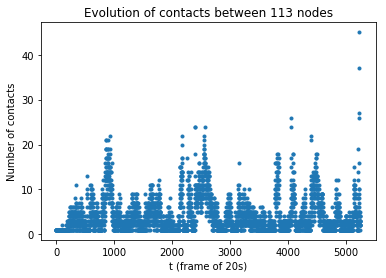

In [3]:
ht2009 = datasets.fetch_HT2009()

count = []
for frame in ht2009:
    count.append(len(frame))

plt.plot(count, '.')
plt.ylabel('Number of contacts')
plt.xlabel('t (frame of 20s)')
plt.title('Evolution of contacts between %s nodes'%ht2009.nr_nodes);

# Markovian Model for SIS processes

Get the infection rate by calculating $p_i^{(t)}$, i.e., the probability for the node $i$ to be in the infectious state at time $t$.

This is equivalent to the numerical calculation of the $p_i^{(t)}$ using Equation (2) of the paper from Eugentio and Vittoria   
(http://arxiv.org/pdf/1406.4815v1.pdf).

In [4]:
def infection_rate(data, lmbda, mu, verbose=False):
    p = ones((data.nr_nodes, data.nr_frames))-0.1

    for it in range(40):
        p_pred = p.copy()

        for t, frame in enumerate(data):
            prodj = np.ones(data.nr_nodes)
            for i, j in frame:
                prodj[i] *= 1. -  (lmbda * p[j, t-1])

            p[:, t] = 1 - (1 - ((1 - mu) * p[:, t-1]) ) * prodj

        err = (p_pred - p).sum()
        if verbose:
            print err
        if err < 1e-4:
            break
    else:
        print "iteration limit exceeded. Error:", err
        
    return p.sum()/(data.nr_nodes * data.nr_frames)

# Check the Threshold Condition using different lambdas

In [5]:
lmbdas = linspace(0, 1, 41)

For $\mu = 0.01$

In [6]:
tcs01 = []
mu = 0.01
for lmbda in lmbdas:
    
    p = infection_rate(ht2009, lmbda, mu)
    tcs01.append(p)
    print "Lambda: %.3f, p: %.4f" % (lmbda, p)

Lambda: 0.000, p: 0.0000
Lambda: 0.025, p: 0.0000
Lambda: 0.050, p: 0.0000
Lambda: 0.075, p: 0.0000
Lambda: 0.100, p: 0.0000
Lambda: 0.125, p: 0.0000
Lambda: 0.150, p: 0.0000
Lambda: 0.175, p: 0.0000
Lambda: 0.200, p: 0.0096
Lambda: 0.225, p: 0.0213
Lambda: 0.250, p: 0.0306
Lambda: 0.275, p: 0.0404
Lambda: 0.300, p: 0.0500
Lambda: 0.325, p: 0.0596
Lambda: 0.350, p: 0.0691
Lambda: 0.375, p: 0.0783
Lambda: 0.400, p: 0.0871
Lambda: 0.425, p: 0.0955
Lambda: 0.450, p: 0.1035
Lambda: 0.475, p: 0.1110
Lambda: 0.500, p: 0.1181
Lambda: 0.525, p: 0.1249
Lambda: 0.550, p: 0.1312
Lambda: 0.575, p: 0.1372
Lambda: 0.600, p: 0.1429
Lambda: 0.625, p: 0.1483
Lambda: 0.650, p: 0.1534
Lambda: 0.675, p: 0.1583
Lambda: 0.700, p: 0.1631
Lambda: 0.725, p: 0.1676
Lambda: 0.750, p: 0.1720
Lambda: 0.775, p: 0.1762
Lambda: 0.800, p: 0.1802
Lambda: 0.825, p: 0.1842
Lambda: 0.850, p: 0.1880
Lambda: 0.875, p: 0.1916
Lambda: 0.900, p: 0.1952
Lambda: 0.925, p: 0.1986
Lambda: 0.950, p: 0.2019
Lambda: 0.975, p: 0.2051


For $\mu = 0.02$

In [7]:
tcs02 = []
mu = 0.02
for lmbda in lmbdas:
    
    p = infection_rate(ht2009, lmbda, mu)
    tcs02.append(p)
    print "Lambda: %.3f, p: %.4f" % (lmbda, p)

Lambda: 0.000, p: 0.0000
Lambda: 0.025, p: 0.0000
Lambda: 0.050, p: 0.0000
Lambda: 0.075, p: 0.0000
Lambda: 0.100, p: 0.0000
Lambda: 0.125, p: 0.0000
Lambda: 0.150, p: 0.0000
Lambda: 0.175, p: 0.0000
Lambda: 0.200, p: 0.0000
Lambda: 0.225, p: 0.0000
Lambda: 0.250, p: 0.0000
Lambda: 0.275, p: 0.0000
Lambda: 0.300, p: 0.0000
Lambda: 0.325, p: 0.0003
Lambda: 0.350, p: 0.0021
Lambda: 0.375, p: 0.0063
Lambda: 0.400, p: 0.0100
Lambda: 0.425, p: 0.0131
Lambda: 0.450, p: 0.0163
Lambda: 0.475, p: 0.0199
Lambda: 0.500, p: 0.0243
Lambda: 0.525, p: 0.0281
Lambda: 0.550, p: 0.0314
Lambda: 0.575, p: 0.0346
Lambda: 0.600, p: 0.0377
Lambda: 0.625, p: 0.0410
Lambda: 0.650, p: 0.0443
Lambda: 0.675, p: 0.0476
Lambda: 0.700, p: 0.0506
Lambda: 0.725, p: 0.0536
Lambda: 0.750, p: 0.0565
Lambda: 0.775, p: 0.0594
Lambda: 0.800, p: 0.0623
Lambda: 0.825, p: 0.0651
Lambda: 0.850, p: 0.0680
Lambda: 0.875, p: 0.0708
Lambda: 0.900, p: 0.0735
Lambda: 0.925, p: 0.0763
Lambda: 0.950, p: 0.0789
Lambda: 0.975, p: 0.0816


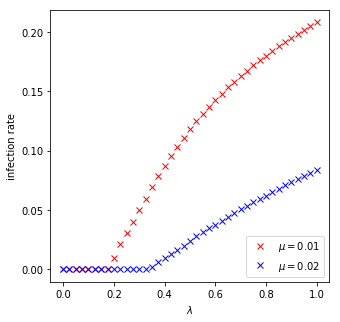

In [8]:
figure(figsize=(5,5))
plot(lmbdas, tcs01, 'rx', label='$\mu=0.01$')
plot(lmbdas, tcs02, 'bx', label='$\mu=0.02$')
legend(loc='lower right')
# ylim(0,1)
xlabel("$\lambda$")
ylabel("infection rate");

Phase contour plot $\mu$ vs $\lambda$ 

In [9]:
lmbdas = linspace(0, 1, 11)
mus = linspace(1e-4, 0.05, 21)

In [10]:
results = np.zeros((lmbdas.shape[0], mus.shape[0]))

In [11]:
for i, lmbda in enumerate(lmbdas):
    for j, mu in enumerate(mus):
        results[i,j] = infection_rate(ht2009, lmbda, mu)
    print i

iteration limit exceeded. Error: 0.00037375908781955847
0
1
2
3
4
5
6
7
8
9
10


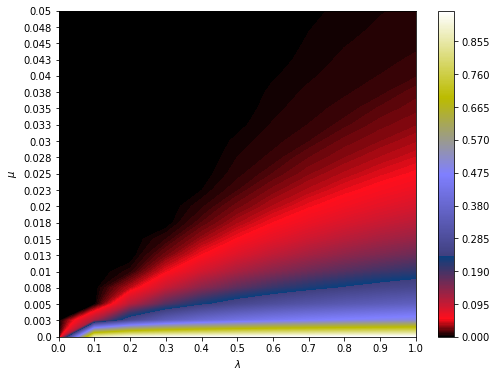

In [12]:
figure(figsize=(8,6))
plt.contourf(results.T, 1000, cmap=cm.gist_stern)
plt.colorbar()
xlabel("$\lambda$")
ylabel("$\mu$")
xticks(range(len(lmbdas)), lmbdas.round(2))
yticks(range(len(mus)), mus.round(3));

Let's build a new colormap (based on the `gist_stern` colormap) to clearly show the phase transition.

In [13]:
spec = {
        'red': (
            (0.000, 0.000, 0.000), (0.01, 0.000, 1.000),
            (0.2500, 0.250, 0.250),
            (1.000, 1.000, 1.000)),
        'green': ((0, 0, 0), (1, 1, 1)),
        'blue': (
            (0.000, 0.000, 0.000), (0.500, 1.000, 1.000),
            (0.735, 0.000, 0.000), (1.000, 1.000, 1.000))
}

import matplotlib.colors as colors
cm_stern = colors.LinearSegmentedColormap('stern', spec, 1000)

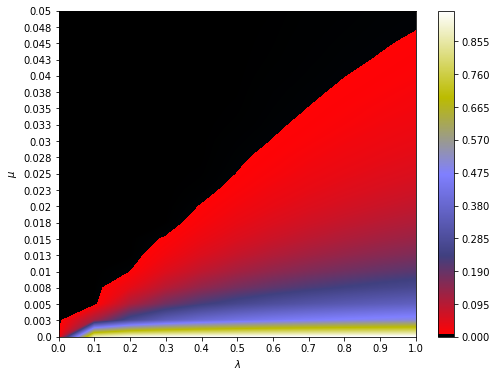

In [14]:
figure(figsize=(8,6))
plt.contourf(results.T, 1000, cmap=cm_stern)
plt.colorbar()
xlabel("$\lambda$")
ylabel("$\mu$")
xticks(range(len(lmbdas)), lmbdas.round(2))
yticks(range(len(mus)), mus.round(3));